In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [16]:
REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    img = img / 255.0  # Normalize image intensity
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
    
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    print(f"Encountered an error while processing item '{f}' at directory '{label}', skipping...")
                    print(e)

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", np.array(self.training_data, dtype=object))
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

In [17]:
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [19]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [20]:
print(len(training_data))

24946


In [24]:
print(training_data[2])

[array([[0.09019608, 0.08627451, 0.09019608, ..., 0.05882353, 0.05490196,
         0.05098039],
        [0.09411765, 0.09019608, 0.09019608, ..., 0.0627451 , 0.05882353,
         0.05490196],
        [0.09411765, 0.09019608, 0.09019608, ..., 0.0627451 , 0.0627451 ,
         0.05882353],
        ...,
        [0.42352941, 0.45882353, 0.47843137, ..., 0.39215686, 0.34901961,
         0.25882353],
        [0.41568627, 0.41960784, 0.4627451 , ..., 0.34117647, 0.19215686,
         0.27843137],
        [0.41568627, 0.40784314, 0.43921569, ..., 0.27843137, 0.31764706,
         0.3372549 ]])
 array([0., 1.])]


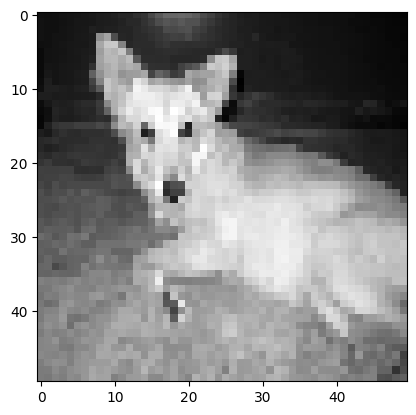

In [23]:
import matplotlib.pyplot as plt

plt.imshow(training_data[2][0], cmap="gray")
plt.show()